# Benchmarking `nvjpeg` 📊

In [ ]:
%run benchmark_nvjpeg_LoLa.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [1]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    #'1920x1080': (1920, 1080),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
}

# Parameters to benchmark
QUALITIES = range(40, 96, 1)
SUBSAMPLINGS = ['4:2:0']

SUBSAMPLING_TO_PARAM = {
    '4:2:0': '420'
}

In [2]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results_nvjpeg_LoLa.csv')
df.head()

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD,Frame
0,1280x720,10,4:2:0,1000,0.000177,0.218959,0.000006,0.000442,0.117830,0.000658,27.174,29.505058,0.803319,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
1,1280x720,11,4:2:0,1000,0.000148,0.117405,0.000006,0.000456,0.113955,0.000654,28.461,29.784565,0.813303,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
2,1280x720,12,4:2:0,1000,0.000149,0.117582,0.000006,0.000470,0.119051,0.000663,29.628,30.260040,0.825846,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
3,1280x720,13,4:2:0,1000,0.000149,0.117461,0.000005,0.000483,0.114114,0.000654,30.926,30.647518,0.837550,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
4,1280x720,14,4:2:0,1000,0.000149,0.121422,0.000005,0.000496,0.110577,0.000651,31.987,30.965652,0.843547,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1


In [4]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

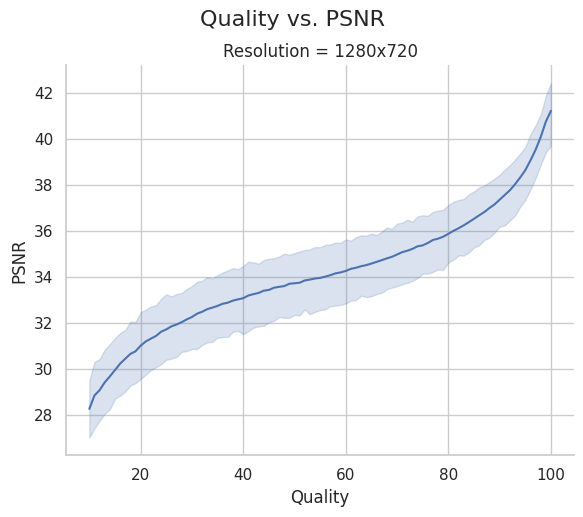

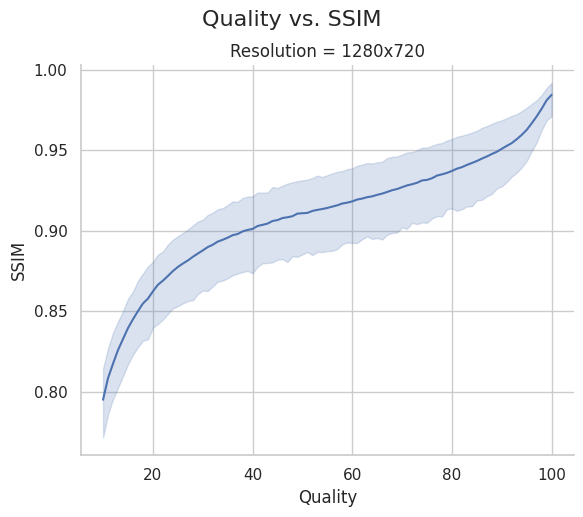

In [5]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


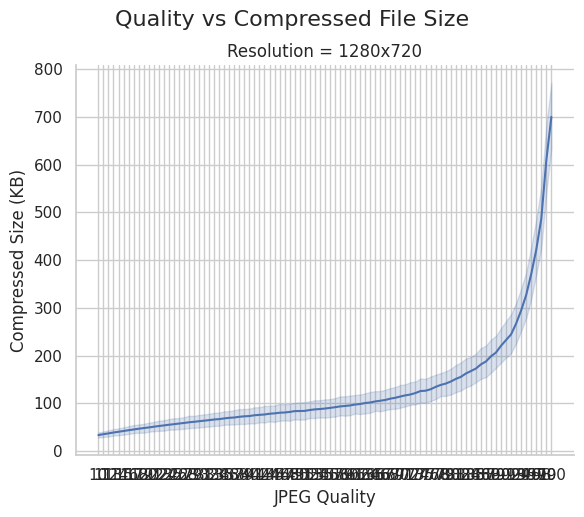

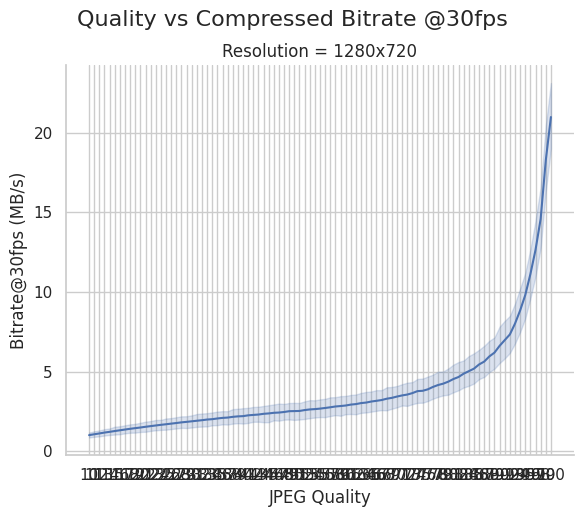

In [6]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
g.set(xticks=QUALITIES)
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
g.set(xticks=QUALITIES)
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

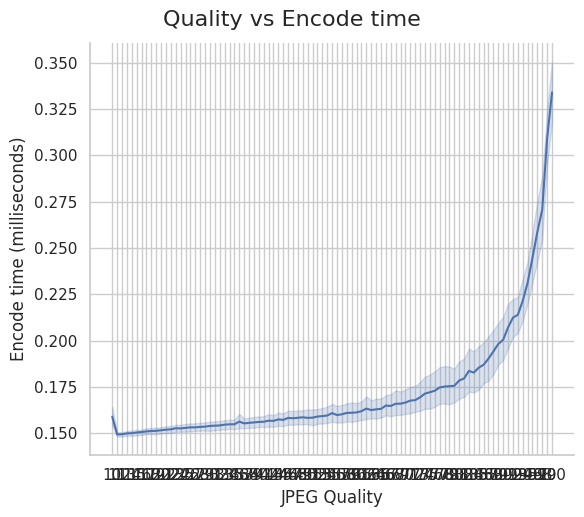

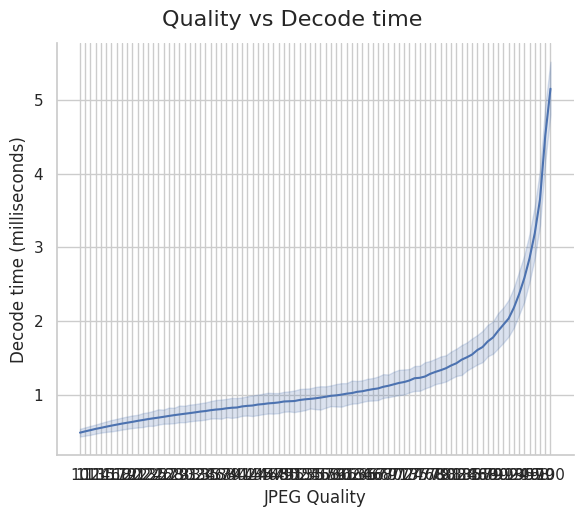

In [7]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
g.set(xticks=QUALITIES)
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
g.set(xticks=QUALITIES)
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
plt.show()

### Perform average avross frames

In [8]:
df_agg = df.groupby('Quality').agg({
    #'Quality': 'first',  # kept as-is (assuming same value across group)
    'Avg Encode Time (s)': 'mean',  # averaged
    'Avg Decode Time (s)': 'mean',
    'Compressed Size (KB)': 'mean',
    'PSNR': 'mean',
    'SSIM': 'mean',
}).reset_index()
df_agg

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
0,10,0.000159,0.000489,33.504143,28.265667,0.794899
1,11,0.000149,0.000506,35.304714,28.849843,0.808368
2,12,0.000150,0.000523,37.029571,29.077786,0.817312
3,13,0.000150,0.000540,38.861571,29.417837,0.825803
4,14,0.000150,0.000554,40.405643,29.676640,0.832653
...,...,...,...,...,...,...
85,95,0.000231,0.002585,326.861643,38.635132,0.962763
86,96,0.000235,0.002591,329.243273,39.867779,0.973457
87,97,0.000243,0.002820,360.991600,40.470818,0.976476
88,98,0.000246,0.003096,392.247750,41.244596,0.979401


In [9]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 2 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
89,99,0.000278,0.003526,449.173000,41.628008,0.984726
88,98,0.000246,0.003096,392.247750,41.244596,0.979401
87,97,0.000243,0.002820,360.991600,40.470818,0.976476
86,96,0.000235,0.002591,329.243273,39.867779,0.973457
85,95,0.000231,0.002585,326.861643,38.635132,0.962763


In [10]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 1.5 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1.5]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
86,96,0.000235,0.002591,329.243273,39.867779,0.973457
85,95,0.000231,0.002585,326.861643,38.635132,0.962763
84,94,0.000221,0.002367,294.565357,38.317462,0.959667
83,93,0.000214,0.002183,267.059786,38.026111,0.956968
82,92,0.000212,0.002037,244.374643,37.764043,0.954561


In [11]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
79,89,0.000198,0.001779,206.323214,37.149343,0.949162
78,88,0.000194,0.001726,198.373071,36.991306,0.947778
77,87,0.000190,0.001650,187.550143,36.815553,0.946227
76,86,0.000187,0.001609,181.533286,36.674028,0.944901
75,85,0.000185,0.001548,172.732143,36.525199,0.943425


In [12]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 0.5 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 0.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 0.5]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
30,40,0.000156,0.000830,73.270500,33.074699,0.901146
29,39,0.000156,0.000826,72.775500,33.025467,0.900556
28,38,0.000156,0.000819,71.772000,32.971244,0.899636
27,37,0.000155,0.000807,70.277857,32.881747,0.897993
26,36,0.000156,0.000802,69.605500,32.833471,0.897291
